In [1]:
import pandas as pd
import numpy as np

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

import matplotlib.pyplot as plt

In [2]:
# Generate a random n-class classification problem
n = 1000
X, y = make_classification(n_samples=n, n_features=1,  
                                             n_informative=1, n_redundant=0, n_clusters_per_class=1)

# Create a dataframe of the feature and class
df = pd.DataFrame({'Feature': X.flatten(), 'Class': y.flatten()})
print('Dataframe Head')
print(df.head())
print()

Dataframe Head
    Feature  Class
0  0.264172      1
1  0.687049      1
2 -0.245641      0
3 -1.238884      0
4  1.018866      1



In [3]:
print('Model Summary')
import statsmodels.api as sm
logit=sm.Logit(df['Class'], df['Feature'])
result=logit.fit()
print(result.summary2())

Model Summary
Optimization terminated successfully.
         Current function value: 0.140716
         Iterations 9
                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.797   
Dependent Variable: Class            AIC:              283.4315
Date:               2018-11-05 19:50 BIC:              288.3393
No. Observations:   1000             Log-Likelihood:   -140.72 
Df Model:           0                LL-Null:          -693.14 
Df Residuals:       999              LLR p-value:      nan     
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     9.0000                                     
-----------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|    [0.025   0.975]
-----------------------------------------------------------------
Feature    4.6812     0.3426   13.6643   0.0000   4.0097   5.3527



In [4]:
nX = df['Feature'].values.reshape(-1,1)
ny = df['Class'].values
model = LogisticRegression(C=1e9, solver='lbfgs')
model.fit(nX, ny)
predictions = model.predict(nX)

print('Iterations: ', model.n_iter_)
print('Intercept: ', model.intercept_)
print('Coefficient: ', model.coef_)
print()

print('Accuracy Score')
print(accuracy_score(ny, predictions))
print()

print('Confustion matrix')
print(confusion_matrix(ny,predictions))
tn, fp, fn, tp = confusion_matrix(ny,predictions).ravel()
print('tn: {} fp: {} fn: {} tp: {}'.format(tn, fp, fn, tp))
print()

print('Classification Report')
print(classification_report(ny,predictions))
print()

print('Misclassified count and location')
misclassified = np.flatnonzero(ny != predictions)
print(len(misclassified), misclassified)
print()
print(df.loc[misclassified,:])

Iterations:  [11]
Intercept:  [ 0.43325615]
Coefficient:  [[ 4.83953473]]

Accuracy Score
0.962

Confustion matrix
[[484  18]
 [ 20 478]]
tn: 484 fp: 18 fn: 20 tp: 478

Classification Report
             precision    recall  f1-score   support

          0       0.96      0.96      0.96       502
          1       0.96      0.96      0.96       498

avg / total       0.96      0.96      0.96      1000


Misclassified count and location
38 [ 17  43  56  68  77 127 140 166 205 221 277 309 361 378 382 408 409 441
 470 475 505 524 559 568 601 626 634 638 648 713 716 891 908 942 944 965
 975 990]

      Feature  Class
17  -0.469784      1
43  -0.060179      0
56  -0.513795      1
68  -0.142280      1
77  -0.856250      1
127  0.328579      0
140 -0.333230      1
166 -0.124978      1
205  0.056249      0
221 -0.036837      0
277 -0.302953      1
309 -0.016942      0
361  0.041838      0
378 -0.513820      1
382  0.039817      0
408 -1.003039      1
409  0.136266      0
441 -0.277706      1
4

In [5]:
# https://stats.stackexchange.com/questions/203740/logistic-regression-scikit-learn-vs-statsmodels
# sklearn
mdl = LogisticRegression(C=1e9, solver='lbfgs')
sklearn = mdl.fit(nX, ny)
print('Sklearn coef_: ', sklearn.coef_.flatten()[0])
print()

# sm
statsmodel = sm.Logit(df['Class'], df['Feature'])
print(statsmodel.fit().params)

Sklearn coef_:  4.83953473044

Optimization terminated successfully.
         Current function value: 0.140716
         Iterations 9
Feature    4.681199
dtype: float64


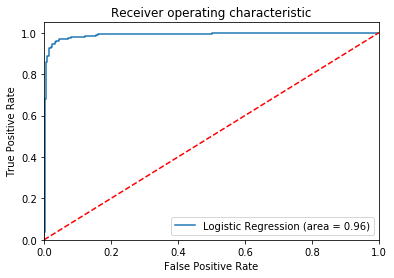

In [6]:
# https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
logit_roc_auc = roc_auc_score(ny, model.predict(nX))
fpr, tpr, thresholds = roc_curve(ny, model.predict_proba(nX)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

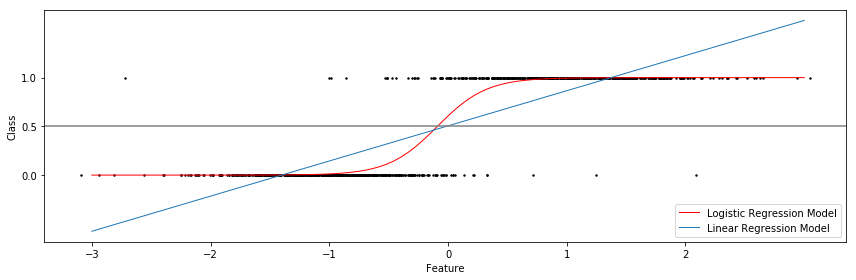

In [7]:
# Code source: Gael Varoquaux
# License: BSD 3 clause

# Plot the logistic and linear models
plt.figure(figsize=(12, 4))
plt.clf()
plt.scatter(df['Feature'], df['Class'], color='black', s=2)
X_line = np.linspace(-3, 3, 100)

def model_func(x):
    return 1 / (1 + np.exp(-x))

loss = model_func(X_line * model.coef_ + model.intercept_).ravel()
plt.plot(X_line, loss, color='red', linewidth=1)

ols = LinearRegression()
ols.fit(nX, df['Class'])
plt.plot(X_line, ols.coef_ * X_line + ols.intercept_, linewidth=1)
plt.axhline(.5, color='.5')

plt.ylabel('Class')
plt.xlabel('Feature')
plt.xticks(range(-3, 3))
plt.yticks([0, 0.5, 1])
plt.legend(('Logistic Regression Model', 'Linear Regression Model'), loc="lower right")
plt.tight_layout()
plt.show()